<a href="https://colab.research.google.com/github/LMAPcoder/Machine-Learning-Lab/blob/main/MLL_sheet9_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab Programming Machine Learning**

Name: Leonardo Antiqui

Matriculation number: 312940

Group 2 Monday

## Exercise Sheet 9

### Exercise 1: Implement Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Uploading the file
!wget --no-check-certificate 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' -O iris.data
!wget --no-check-certificate 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data' -O car.data

--2022-01-21 19:27:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-01-21 19:27:25 (170 MB/s) - ‘iris.data’ saved [4551/4551]

--2022-01-21 19:27:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data’

car.data            100%[===================>]  50.65K  --.-KB/s    in 0.02s   

2022-01-21 19:27:25 (2.13 M

In [ ]:
df_iris = pd.read_csv('iris.data',header=None)

In [ ]:
header = ['sepal_length','sepal_width','petal_length','petal_width','species']

In [ ]:
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris.groupby(4).size()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
df_car = pd.read_csv('car.data',header=None)

In [ ]:
header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class']

In [ ]:
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df_car.groupby(6).size()

6
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

Splitting the data

In [ ]:
# Input: dataframe, ratio of training data, ratio od validation data
# Output: 2-3 dataframes split accordingly
def data_partition(df,train_ratio,valid_ratio=None):
  N, M = df.shape
  df_sample = df.sample(frac=1,random_state=3116) #Return a random sample of items from an axis of object
  split1 = int(N*train_ratio)
  data_Train = df_sample[:split1]

  if valid_ratio is None:
    data_Test = df_sample[split1:]
    return data_Train,data_Test
  else:
    split2 = int(N*(train_ratio+valid_ratio))
    data_Valid = df_sample[split1:split2]
    data_Test = df_sample[split2:]
    return data_Train,data_Test,data_Valid

In [ ]:
#Splitting Iris dataset
train_iris, test_iris, valid_iris = data_partition(df_iris,0.7,0.15)
output = 4
X_train_iris = train_iris.drop(output,axis=1).to_numpy()
y_train_iris = train_iris[output].to_numpy().reshape(-1,1)
X_test_iris = test_iris.drop(output,axis=1).to_numpy()
y_test_iris = test_iris[output].to_numpy().reshape(-1,1)
X_valid_iris = valid_iris.drop(output,axis=1).to_numpy()
y_valid_iris = valid_iris[output].to_numpy().reshape(-1,1)

X_train_iris[:5]

array([[5.5, 3.5, 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [7.7, 2.8, 6.7, 2. ],
       [7.2, 3.6, 6.1, 2.5],
       [5.8, 4. , 1.2, 0.2]])

In [ ]:
#Splitting Car Evaluation dataset
train_car, test_car, valid_car = data_partition(df_car,0.7,0.15)
output = 4
X_train_car = train_car.drop(output,axis=1).to_numpy()
y_train_car = train_car[output].to_numpy().reshape(-1,1)
X_test_car = test_car.drop(output,axis=1).to_numpy()
y_test_car = test_car[output].to_numpy().reshape(-1,1)
X_valid_car = valid_car.drop(output,axis=1).to_numpy()
y_valid_car = valid_car[output].to_numpy().reshape(-1,1)

X_train_car[:5]

array([['high', 'high', '5more', '4', 'low', 'unacc'],
       ['high', 'vhigh', '5more', '2', 'med', 'unacc'],
       ['high', 'high', '3', '2', 'med', 'unacc'],
       ['med', 'low', '4', 'more', 'high', 'good'],
       ['low', 'med', '3', '2', 'high', 'unacc']], dtype=object)

Learning decision tree classifier

Warning: the following code is based on the github repository of Sujan Dutta. However it was extended to work as classification, regression or probability tree as needed and to accept different type of splitting criterions.

In [ ]:
class Node():
  def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):

    # for decision node
    self.feature_index = feature_index  #feature index of the condition (df[feature_index]<=threshold)
    self.threshold = threshold  #value of the condition
    self.left = left  #left child. By convention: yes answer
    self.right = right  #left right. By convention: no answer
    self.info_gain = info_gain  #information gain by the splitting

    # for leaf node
    self.value = value  #predicted class

In [ ]:
class DecisionTree():
    def __init__(self, mode='classification', min_samples_split=2, max_depth=2,min_gain=0,splitting_criterion='entropy'):

      # initialize the root of the tree
      self.root = None

      # stopping conditions for regularization
      self.min_samples_split = min_samples_split  #miminum number of samples a node needs to have to be split
      self.max_depth = max_depth  #maximum depth of the tree
      self.min_gain = min_gain
      self.splitting_criterion = splitting_criterion
      self.mode = mode
      self.classes = None #number of classes

    def build_tree(self, dataset, curr_depth=0):

      X, Y = dataset[:,:-1], dataset[:,-1]
      num_samples, num_features = np.shape(X)

      if curr_depth==0:
        self.classes = np.unique(Y)

      # split until stopping conditions are met
      if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:  #stopping conditions

          best_split = self.get_best_split(dataset, num_samples, num_features)

          if best_split["info_gain"]>self.min_gain: # check if information gain is positive

              left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)

              right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
              # return decision node
              return Node(best_split["feature_index"], best_split["threshold"],
                          left_subtree, right_subtree, best_split["info_gain"])

      leaf_value = self.calculate_leaf_value(Y) # compute leaf node value based on mayority class

      return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):

      best_split = {} #dictionary to store the best split
      max_info_gain = -float("inf") #This value is set to -inf to ensure that the first threshold replace it

      for feature_index in range(num_features): #loop over all the columns
          feature_values = dataset[:, feature_index]  #take one column
          possible_thresholds = np.unique(feature_values) #take unique values of the column

          #uses only one threshold
          for threshold in possible_thresholds: # loop over all the unique values of the column
              dataset_left, dataset_right = self.split(dataset, feature_index, threshold) #get the child datasets base on the threshold

              if len(dataset_left)>0 and len(dataset_right)>0: # check if childs are not null
                  y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1] #get only the labels

                  curr_info_gain = self.information_gain(y, left_y, right_y)

                  # update the best split if needed
                  if curr_info_gain>max_info_gain:
                      best_split["feature_index"] = feature_index
                      best_split["threshold"] = threshold
                      best_split["dataset_left"] = dataset_left
                      best_split["dataset_right"] = dataset_right
                      best_split["info_gain"] = curr_info_gain
                      max_info_gain = curr_info_gain

      # return best split
      return best_split #dictionary

    def split(self, dataset, feature_index, threshold): #binary split dataset based on the threshold
      #This method works for both continous and nominal features, but only accepts values (not sets for example)
      dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold]) #dataset that fulfill the condition given by the threshold
      dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
      return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child): #calculate information gain/index-gini

      weight_l = len(l_child) / len(parent)
      weight_r = len(r_child) / len(parent)
      if self.splitting_criterion=="gini":
        gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
      elif self.splitting_criterion=='MCR':
        gain = self.MCR(parent) - (weight_l*self.MCR(l_child) + weight_r*self.MCR(r_child))
      elif self.splitting_criterion=='cross_entropy':
        gain = self.cross_entropy(parent) - (weight_l*self.cross_entropy(l_child) + weight_r*self.cross_entropy(r_child))
      elif self.splitting_criterion=='MSE':
        gain = self.MSE(parent) - (weight_l*self.MSE(l_child) + weight_r*self.MSE(r_child))
      else: #shannon entropy
        gain = self.shannon_entropy(parent) - (weight_l*self.shannon_entropy(l_child) + weight_r*self.shannon_entropy(r_child))
      return gain

    def shannon_entropy(self, y): #calculate entropy
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls) #shannon entropy
        return entropy

    def cross_entropy(self, y): #calculate entropy
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log(p_cls) #shannon entropy
        return entropy

    def gini_index(self, y): #calculate gini impurity
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def MCR(self,y): #miss classification rate/accuracy
      y = list(y)
      class_label = max(y, key=y.count)
      return (np.array(y) != class_label).mean()

    def MSE(self,y):
      return ((y-y.mean())**2).mean()

    def calculate_leaf_value(self, y): #calculate mayority class. it does not calculate average
        if self.mode=='regression':
          val = y.mean()
        if self.mode=='probability':
          val = []
          for cls in self.classes:
            p_cls = len(y[y == cls]) / len(y)
            val.append(p_cls)
        else:  #classification
          y = list(y)
          val = max(y, key=y.count)
        return val

    def print_tree(self, tree=None, indent=" "):

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def print_hist(self, X, y, tree=None):  #print histogram
      if not tree:
        tree = self.root

      if tree.value is None:

        dataset = np.concatenate((X, y), axis=1)
        dataset_left, dataset_right = self.split(dataset, tree.feature_index, tree.threshold)


        fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

        X_left, y_left = dataset_left[:,:-1], dataset_left[:,-1]
        class_labels = np.unique(y_left)
        classes = list()
        for cls in class_labels:
          classes.append([cls,len(y_left[y_left == cls])/len(y_left)])

        classes = np.array(classes,dtype='O')
        ax1.set_title(f'left: X_{tree.feature_index}<={tree.threshold}')
        ax1.set_xlabel('Classes')
        ax1.set_ylabel('Frequency')
        ax1.bar(classes[:,0],classes[:,1])

        X_right, y_right = dataset_right[:,:-1], dataset_right[:,-1]
        class_labels = np.unique(y_right)
        classes = list()
        for cls in class_labels:
          classes.append([cls,len(y_right[y_right == cls])/len(y_right)])

        classes = np.array(classes,dtype='O')
        ax2.set_title(f'right: X_{tree.feature_index}>{tree.threshold}')
        ax2.set_xlabel('Classes')
        ax2.set_ylabel('Frequency')
        ax2.bar(classes[:,0],classes[:,1])


        plt.show()

        self.print_hist(X_left,y_left.reshape(-1,1),tree.left)
        self.print_hist(X_right,y_right.reshape(-1,1),tree.right)


    def fit(self, X, y):  #function to pass the data to the tree builder
        dataset = np.concatenate((X, y), axis=1)  #only numpy arrays
        self.root = self.build_tree(dataset) #assign the tree to the root attribute

    def predict(self, X):
      if self.mode=='probability':
        predictions = []
        for x in X:
          p = self.make_prediction(x, self.root)
          cls = self.classes[np.argmax(np.array(p))]
          predictions.append(cls)
      else:
        predictions = [self.make_prediction(x, self.root) for x in X]
      return np.array(predictions).reshape(-1,1)

    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value #tree.value is None for nodes that are not leaves
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def accuracy(self,X,y):
      y_pred = self.predict(X)
      return (y == y_pred).mean()

    def cross_Entropy(self,X,y):
      entropy = 0
      for i,x in enumerate(X):
        p = self.make_prediction(x, self.root)
        entropy += -np.log((y[i] == np.array(self.classes))@p)
      return entropy


#### Part A

##### Iris dataset

Hyperparameter tuning

Generating grid

In [ ]:
#Grid generator
np.random.seed(3116)
min_samples_split = np.array([5,10,15]) #set of minimum numbers of samples a node needs to have to be split
max_depth = np.array([3,5,7]) #set of maximum depths
# splitting_criterion = np.array(['entropy','gini','MCR']) #set of quality criterion
grid = np.array(np.meshgrid(min_samples_split,max_depth),dtype='O').T.reshape(-1,2)
np.random.shuffle(grid)
grid = grid.tolist()
print('Samples of the grid:',grid[:5],sep='\n')

Samples of the grid:
[[10, 7], [5, 5], [15, 3], [10, 3], [15, 5]]


Grid search

In [ ]:
#Tuning function
def tuning(X_train,y_train,X_valid,y_valid,grid):
  grid_acc = list()
  for hps in grid:
    classifier = DecisionTree(mode='probability', min_samples_split=hps[0], max_depth=hps[1], splitting_criterion='MCR')
    classifier.fit(X_train, y_train)
    acc = classifier.accuracy(X_valid,y_valid)
    grid_acc.append([hps[0],hps[1],acc])
  return max(grid_acc, key=lambda hp: hp[2])

Tuning for Iris dataset

In [ ]:
best_hp = tuning(X_train_iris,y_train_iris,X_valid_iris,y_valid_iris,grid)
print('Best set of hyperparameters:',best_hp)

Best set of hyperparameters: [10, 7, 0.9545454545454546]


Traing model with best hyperparameters

In [ ]:
classifier_iris = DecisionTree(mode='probability', min_samples_split=10, max_depth=7, splitting_criterion='MCR')
classifier_iris.fit(X_train_iris, y_train_iris)
classifier_iris.print_tree()

X_2 <= 1.9 ? 0.3142857142857143
 left:[1.0, 0.0, 0.0]
 right:X_3 <= 1.6 ? 0.41666666666666663
  left:X_2 <= 4.9 ? 0.025000000000000005
    left:[0.0, 1.0, 0.0]
    right:[0.0, 0.3333333333333333, 0.6666666666666666]
  right:[0.0, 0.03125, 0.96875]


Histograms at each decision step

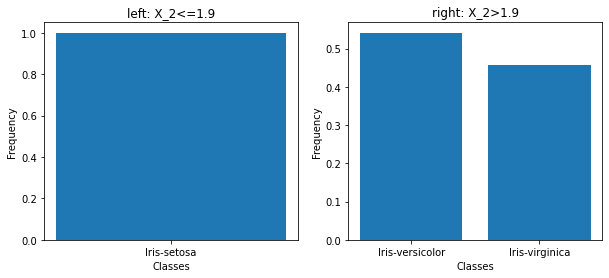

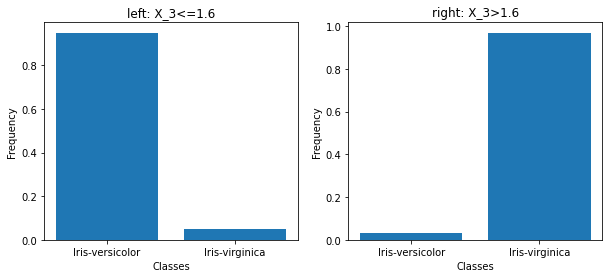

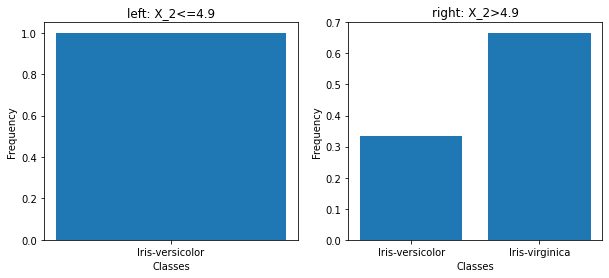

In [ ]:
classifier_iris.print_hist(X_train_iris,y_train_iris)

In [ ]:
ce_valid_iris = classifier_iris.cross_Entropy(X_valid_iris,y_valid_iris)
print('Cross entropy loss on validation dataset:',ce_valid_iris)

Cross entropy loss on validation dataset: 4.125190597424534


In [ ]:
acc_test_iris = classifier_iris.accuracy(X_test_iris,y_test_iris)
print('Accuracy on test dataset:',acc_test_iris)

Accuracy on test dataset: 1.0


##### Car Evaluation dataset

Hyperparameter tuning

In [ ]:
best_hp = tuning(X_train_car,y_train_car,X_valid_car,y_valid_car,grid)
print('Best set of hyperparameters:',best_hp)

Best set of hyperparameters: [15, 3, 0.3474903474903475]


Traing model with best hyperparameters

In [ ]:
classifier_car = DecisionTree(mode='probability', min_samples_split=15, max_depth=3, min_gain=0.004, splitting_criterion='MCR')
classifier_car.fit(X_train_car, y_train_car)
classifier_car.print_tree()

X_5 <= good ? 0.018196856906534276
 left:X_4 <= high ? 0.04885993485342022
  left:X_2 <= 2 ? 0.044303797468354444
    left:X_3 <= 4 ? 0.07692307692307693
        left:[0.20833333333333334, 0.3333333333333333, 0.4583333333333333]
        right:[0.3333333333333333, 0.6666666666666666, 0.0]
    right:X_0 <= high ? 0.025210084033613467
        left:[0.3783783783783784, 0.32432432432432434, 0.2972972972972973]
        right:[0.25609756097560976, 0.2804878048780488, 0.4634146341463415]
  right:X_2 <= 4 ? 0.020134228187919434
    left:[0.5229357798165137, 0.3211009174311927, 0.1559633027522936]
    right:X_5 <= acc ? 0.07500000000000007
        left:[0.3333333333333333, 0.5151515151515151, 0.15151515151515152]
        right:[0.7142857142857143, 0.2857142857142857, 0.0]
 right:X_4 <= high ? 0.0432372505543237
  left:[0.4225941422594142, 0.3179916317991632, 0.2594142259414226]
  right:X_3 <= 2 ? 0.007541478129713397
    left:X_2 <= 4 ? 0.022222222222222254
        left:[0.31683168316831684, 0.3

Histograms at each decision step

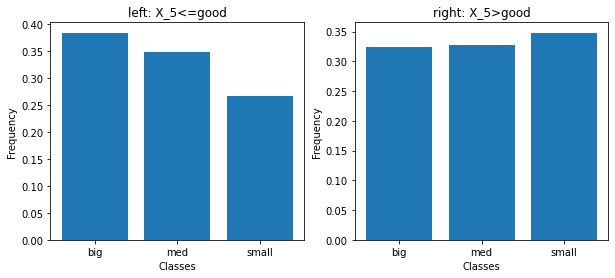

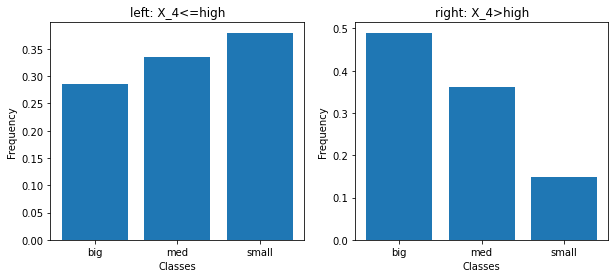

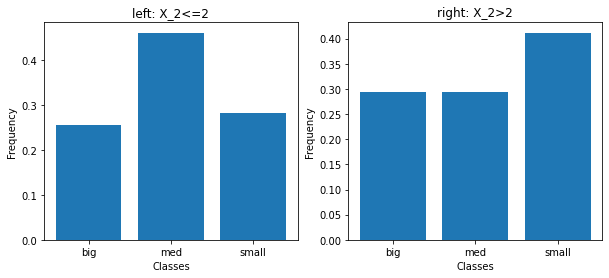

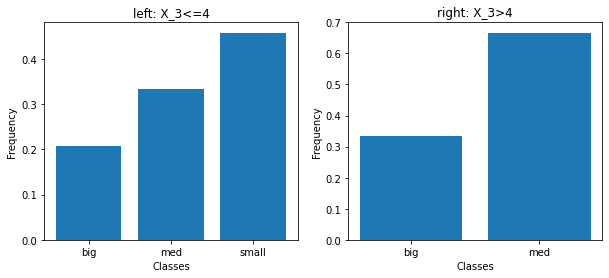

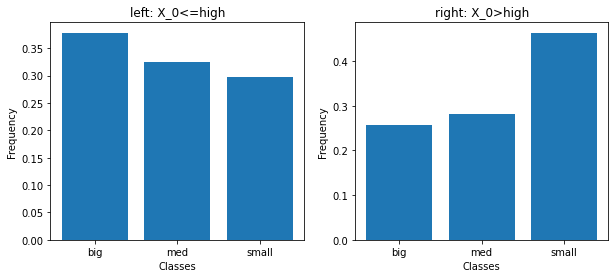

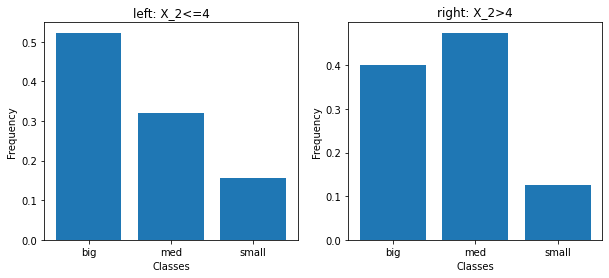

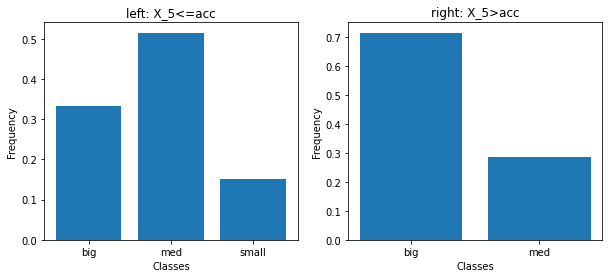

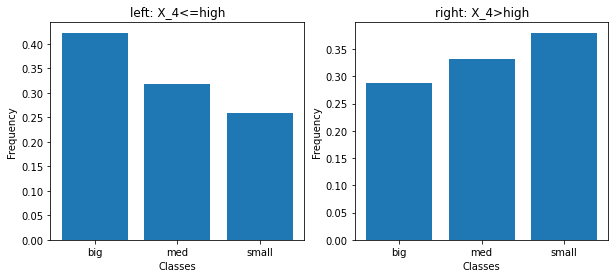

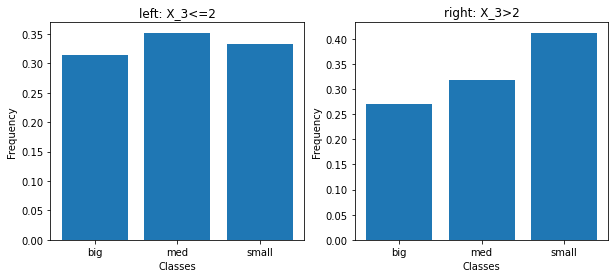

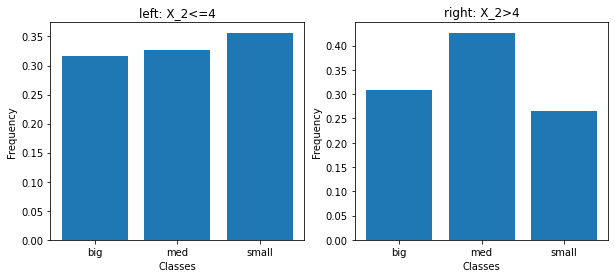

In [ ]:
classifier_car.print_hist(X_train_car,y_train_car)

In [ ]:
ce_valid_car = classifier_car.cross_Entropy(X_valid_car,y_valid_car)
print('Cross entropy loss on validation dataset:',ce_valid_car)

Cross entropy loss on validation dataset: 283.7831821048159


In [ ]:
acc_test_car = classifier_car.accuracy(X_test_car,y_test_car)
print('Accuracy on test dataset:',acc_test_car)

Accuracy on test dataset: 0.3038461538461538


#### Part B

##### Iris dataset

Training using information gain

Warning: using entropy as splitting criterion automatically uses information gain as strictly known

In [ ]:
classifier_iris = DecisionTree(mode='probability', min_samples_split=10, max_depth=7, splitting_criterion='entropy')
classifier_iris.fit(X_train_iris, y_train_iris)
classifier_iris.print_tree()

X_2 <= 1.9 ? 0.8980587934501659
 left:[1.0, 0.0, 0.0]
 right:X_3 <= 1.6 ? 0.7467099300936768
  left:X_2 <= 4.9 ? 0.21752476956186956
    left:[0.0, 1.0, 0.0]
    right:[0.0, 0.3333333333333333, 0.6666666666666666]
  right:X_2 <= 4.8 ? 0.11453208987010625
    left:[0.0, 0.3333333333333333, 0.6666666666666666]
    right:[0.0, 0.0, 1.0]


In [ ]:
ce_valid_iris = classifier_iris.cross_Entropy(X_valid_iris,y_valid_iris)
print('Cross entropy loss on validation dataset:',ce_valid_iris)

Cross entropy loss on validation dataset: inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:227: RuntimeWarning: divide by zero encountered in log


In [ ]:
acc_test_iris = classifier_iris.accuracy(X_test_iris,y_test_iris)
print('Accuracy on test dataset:',acc_test_iris)

Accuracy on test dataset: 1.0


##### Car Evaluation dataset

In [ ]:
classifier_car = DecisionTree(mode='probability', min_samples_split=15, max_depth=3, splitting_criterion='entropy')
classifier_car.fit(X_train_car, y_train_car)
classifier_car.print_tree()

X_5 <= unacc ? 0.024525013762329184
 left:X_5 <= good ? 0.007041140217698638
  left:X_4 <= high ? 0.05816534432502607
    left:X_5 <= acc ? 0.06069943413903345
        left:[0.3191489361702128, 0.3333333333333333, 0.3475177304964539]
        right:[0.0, 0.35294117647058826, 0.6470588235294118]
    right:X_0 <= high ? 0.05553326056859276
        left:[0.6129032258064516, 0.3870967741935484, 0.0]
        right:[0.4576271186440678, 0.3559322033898305, 0.1864406779661017]
  right:X_4 <= low ? 0.012577323683721886
    left:X_2 <= 2 ? 0.003062210670022214
        left:[0.3161290322580645, 0.2967741935483871, 0.3870967741935484]
        right:[0.3553530751708428, 0.32801822323462415, 0.31662870159453305]
    right:X_3 <= 2 ? 0.04572497666876951
        left:[0.2971014492753623, 0.3695652173913043, 0.3333333333333333]
        right:[0.13934426229508196, 0.29508196721311475, 0.5655737704918032]
 right:X_2 <= 2 ? 0.08138472377153005
  left:[1.0, 0.0, 0.0]
  right:X_1 <= high ? 0.0258151027424382

In [ ]:
ce_valid_car = classifier_car.cross_Entropy(X_valid_car,y_valid_car)
print('Cross entropy loss on validation dataset:',ce_valid_car)

Cross entropy loss on validation dataset: 273.3622114509631


In [ ]:
acc_test_car = classifier_car.accuracy(X_test_car,y_test_car)
print('Accuracy on test dataset:',acc_test_car)

Accuracy on test dataset: 0.36153846153846153


### Exercise 2: Gradient Boosted Decision Trees


Generating the dataset

In [ ]:
#Importing aditional libraries
from sklearn import datasets

In [ ]:
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=3116)

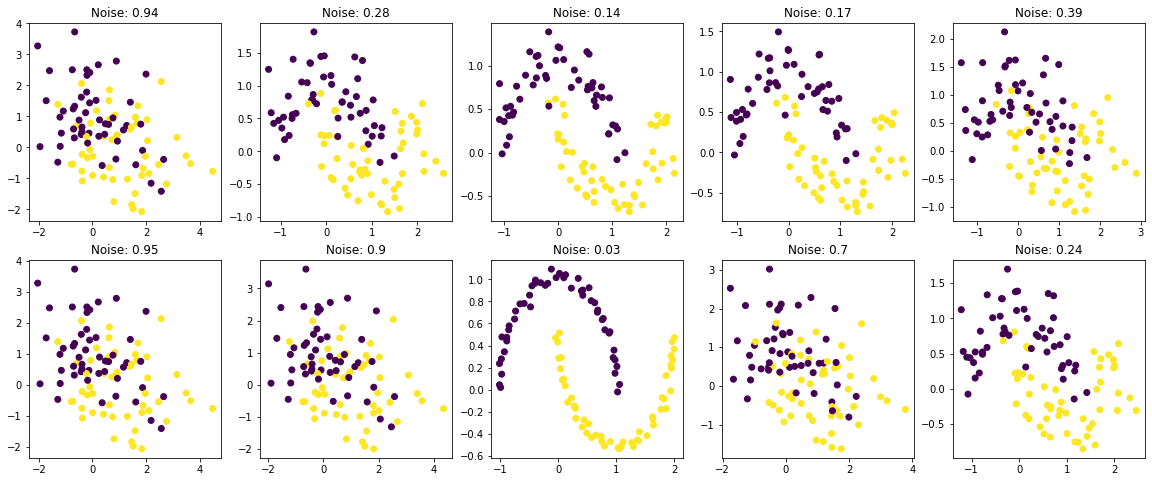

In [ ]:
np.random.seed(3116)
noises = np.random.rand(10)
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(20,8))
X_data = list()
y_data = list()
for idx,noise in enumerate(noises):
  X, y = x(n_samples=100, noise=noise, random_state=3116)
  X_data.append(X)
  y_data.append(y)
  ax[idx//5,idx%5].set_title(f'Noise: {round(noise,2)}')
  ax[idx//5,idx%5].scatter(X[:,0],X[:,1],c=y)
plt.show()

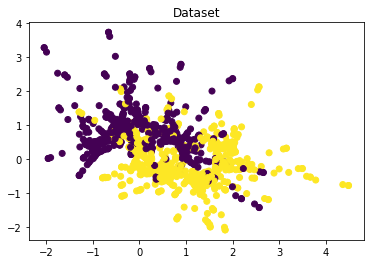

In [ ]:
#Merging moon datasets into one
X_data = np.vstack(X_data)
y_data = np.hstack(y_data)
plt.title('Dataset')
plt.scatter(X_data[:,0],X_data[:,1],c=y_data)
plt.show()

Splitting dataset

In [ ]:
data_moon = np.concatenate((X_data,y_data.reshape(-1,1)),axis=1)
train_moon, test_moon, valid_moon = data_partition(pd.DataFrame(data_moon),0.7,0.15)
output = 2
X_train_moon = train_moon.drop(output,axis=1).to_numpy()
y_train_moon = train_moon[output].to_numpy().reshape(-1,1)
X_test_moon = test_moon.drop(output,axis=1).to_numpy()
y_test_moon = test_moon[output].to_numpy().reshape(-1,1)
X_valid_moon = valid_moon.drop(output,axis=1).to_numpy()
y_valid_moon = valid_moon[output].to_numpy().reshape(-1,1)

X_train_moon[:5]

array([[ 1.29495322, -0.62376256],
       [ 1.85606476,  0.12946307],
       [-0.34731137,  0.99931795],
       [ 1.18540996, -0.16862009],
       [ 2.19002784,  0.95014582]])

Test accuracy using decision tree classifier of exercise 1

In [ ]:
classifier_moon = DecisionTree(mode='classification',min_samples_split=4, max_depth=3, splitting_criterion='entropy')
classifier_moon.fit(X_train_moon, y_train_moon)
classifier_moon.accuracy(X_test_moon,y_test_moon)

0.86

Gradient Boosted

In [ ]:
log = np.log((y_train_moon == 1).sum()/(y_train_moon != 1).sum())
log

0.01142869582362285

In [ ]:
σ = lambda x: np.exp(x)/(1+np.exp(x))

In [ ]:
residual = y_train_moon - σ(log)

In [ ]:
classifier_moon1 = DecisionTree(mode='regression',min_samples_split=4, max_depth=0, splitting_criterion='entropy') #stump
classifier_moon1.fit(X_train_moon, residual)
y_pred1 = classifier_moon1.predict(X_train_moon)
residual1 = residual - y_pred1

In [ ]:
classifier_moon2 = DecisionTree(mode='regression',min_samples_split=4, max_depth=0, splitting_criterion='entropy') #stump
classifier_moon2.fit(X_train_moon, residual)
y_pred2 = classifier_moon2.predict(X_train_moon)
residual2 = residual1 - y_pred2

In [ ]:
classifier_moon3 = DecisionTree(mode='regression',min_samples_split=4, max_depth=0, splitting_criterion='entropy') #stump
classifier_moon3.fit(X_train_moon, residual)
y_pred3 = classifier_moon3.predict(X_train_moon)
residual3 = residual2 - y_pred3

In [ ]:
residual3[:5]

array([[-0.99428571],
       [ 2.00571429],
       [ 1.00571429],
       [-1.99428571],
       [ 2.00571429]])